In [1]:
# pip install sklearn_extra

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn_extra
ERROR: No matching distribution found for sklearn_extra


In [157]:
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [109]:
metadata=pd.read_csv("covid.csv")
metadata.head(3)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/3/31,0,0,0,0,0,negative,No,male,Other
1,2020/3/31,0,0,0,0,0,negative,No,female,Other
2,2020/3/31,0,0,0,0,0,negative,No,male,Other


In [110]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53843 non-null  object
 2   fever                53843 non-null  object
 3   sore_throat          53843 non-null  int64 
 4   shortness_of_breath  53843 non-null  int64 
 5   head_ache            53843 non-null  int64 
 6   corona_result        53843 non-null  object
 7   age_60_and_above     53843 non-null  object
 8   gender               53843 non-null  object
 9   test_indication      53843 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [111]:
metadata['cough']=metadata['cough'].replace(to_replace='None',value=np.nan)
metadata['fever']=metadata['fever'].replace('None',np.nan)
metadata['sore_throat']=metadata['sore_throat'].replace('None',np.nan)
metadata['shortness_of_breath']=metadata['shortness_of_breath'].replace('None',np.nan)
metadata['head_ache']=metadata['head_ache'].replace('None',np.nan)
metadata['gender']=metadata['gender'].replace(['female', 'male', 'None'], [0, 1, np.nan])
metadata['age_60_and_above']=metadata['age_60_and_above'].replace(['None', 'No', 'Yes'], [np.nan, 0 ,1])
metadata['test_indication']=metadata['test_indication'].replace(['Contact with confirmed', 'Other', 'Abroad'], [1, 0, -1])
metadata['corona_result']=metadata['corona_result'].replace(['negative', 'positive', 'other'], [-1, 1, 0])

metadata

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/3/31,0,0,0,0,0,-1,0,1.0,0
1,2020/3/31,0,0,0,0,0,-1,0,0.0,0
2,2020/3/31,0,0,0,0,0,-1,0,1.0,0
3,2020/3/31,0,0,0,0,0,1,0,0.0,0
4,2020/3/31,1,0,0,0,0,-1,0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...
53838,2020/3/22,1,1,0,0,0,-1,1,0.0,-1
53839,2020/3/22,1,1,1,0,1,-1,0,0.0,-1
53840,2020/3/22,1,0,0,0,0,-1,0,0.0,-1
53841,2020/3/22,1,0,0,0,0,-1,0,1.0,0


In [112]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            53843 non-null  object 
 1   cough                53827 non-null  object 
 2   fever                53826 non-null  object 
 3   sore_throat          53843 non-null  int64  
 4   shortness_of_breath  53843 non-null  int64  
 5   head_ache            53843 non-null  int64  
 6   corona_result        53843 non-null  int64  
 7   age_60_and_above     53843 non-null  int64  
 8   gender               52649 non-null  float64
 9   test_indication      53843 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [113]:
metadata["cough"] = pd.to_numeric(metadata["cough"])
metadata["fever"] = pd.to_numeric(metadata["fever"])

In [114]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            53843 non-null  object 
 1   cough                53827 non-null  float64
 2   fever                53826 non-null  float64
 3   sore_throat          53843 non-null  int64  
 4   shortness_of_breath  53843 non-null  int64  
 5   head_ache            53843 non-null  int64  
 6   corona_result        53843 non-null  int64  
 7   age_60_and_above     53843 non-null  int64  
 8   gender               52649 non-null  float64
 9   test_indication      53843 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 4.1+ MB


In [123]:
metadata["cough"]=metadata["cough"].astype('Int64')
metadata["fever"]=metadata["fever"].astype('Int64')
metadata['sore_throat']=metadata['sore_throat'].astype('Int64')
metadata['shortness_of_breath']=metadata['shortness_of_breath'].astype('Int64')
metadata['head_ache']=metadata['head_ache'].astype('Int64')
metadata['gender']=metadata['gender'].astype('Int64')
metadata['age_60_and_above']=metadata['age_60_and_above'].astype('Int64')
metadata['test_indication']=metadata['test_indication'].astype('Int64')
metadata['corona_result']=metadata['corona_result'].astype('Int64')

In [124]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53827 non-null  Int64 
 2   fever                53826 non-null  Int64 
 3   sore_throat          53843 non-null  Int64 
 4   shortness_of_breath  53843 non-null  Int64 
 5   head_ache            53843 non-null  Int64 
 6   corona_result        53843 non-null  Int64 
 7   age_60_and_above     53843 non-null  Int64 
 8   gender               52649 non-null  Int64 
 9   test_indication      53843 non-null  Int64 
dtypes: Int64(9), object(1)
memory usage: 4.6+ MB


In [131]:
X=metadata.copy()
X.drop(["test_date"], axis=1, inplace=True)
X.dropna(inplace=True)
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,-1,0,1,0
1,0,0,0,0,0,-1,0,0,0
2,0,0,0,0,0,-1,0,1,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,-1,0,1,-1
...,...,...,...,...,...,...,...,...,...
53838,1,1,0,0,0,-1,1,0,-1
53839,1,1,1,0,1,-1,0,0,-1
53840,1,0,0,0,0,-1,0,0,-1
53841,1,0,0,0,0,-1,0,1,0


In [132]:
X.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
-1,<NA>,<NA>,<NA>,<NA>,<NA>,47054,<NA>,<NA>,5001
0,44630,47864,51814,51981,51441,818,44833,26423,44547
1,8002,4768,818,651,1191,4760,7799,26209,3084


In [133]:
KM = KMeans(n_clusters=3, init='random', random_state=5)
KM.fit(X)
# KM.predict(X)


array([0, 1, 0, ..., 1, 0, 0])

In [136]:
cluster_labels = KM.labels_
print("分群結果：")
print(cluster_labels)
print("---")

分群結果：
[0 1 0 ... 1 0 0]
---


In [137]:
y = metadata.corona_result
print("真實品種：")
print(y)

真實品種：
0        -1
1        -1
2        -1
3         1
4        -1
         ..
53838    -1
53839    -1
53840    -1
53841    -1
53842    -1
Name: corona_result, Length: 53843, dtype: Int64


In [140]:
kmeans_fit = KMeans(n_clusters = 3).fit(X)
cluster_labels = kmeans_fit.labels_

In [141]:
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print(silhouette_avg)

0.5549510263287533


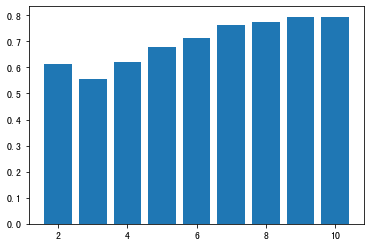

[0.6138843322363559, 0.5549510263287533, 0.6224818668616651, 0.6783267525854034, 0.712587510411357, 0.7623807546051905, 0.7736364636757843, 0.7928643420708463, 0.7945804943901325]


In [142]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [170]:
# k = 1~10 做10次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_list]

In [171]:
print(inertias)

[59377.45749733995, 39661.55061983428, 27724.067004366014, 22004.48199040189, 19254.360332842734, 15922.23478653449, 14313.843175483285, 13373.022408714663, 12467.306864111019, 11369.597025385194]


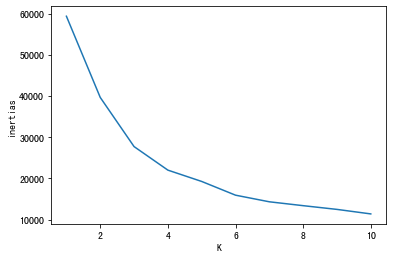

In [172]:
x=[k for k in range(1, 11)]
y=inertias

plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('inertias')
plt.show()

In [173]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:]]

In [174]:
print(silhouette_scores)

[0.6138843322363559, 0.5549510263287533, 0.6224818668616651, 0.6783267525854034, 0.712587510411357, 0.7623807546051905, 0.7726433865672487, 0.7742588477935493, 0.7966115423123957]


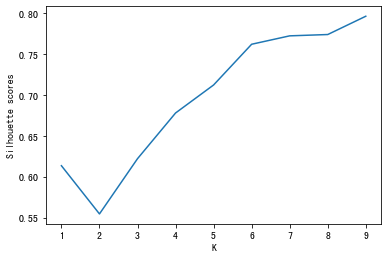

In [175]:
x=[k for k in range(1, 10)]
y=silhouette_scores

plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('Silhouette scores')
plt.show()

In [139]:
# plt.scatter(X,X,c=KM.predict(X))